In [309]:
import numpy as np 
import matplotlib.pyplot as plt

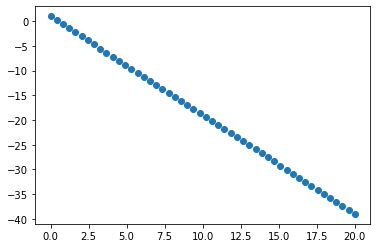

In [310]:
x = np.linspace(0,20)
y = -2 * x + 1
plt.scatter(x,y)
x = x.reshape(len(y),1)
#print(x)
x0 = np.ones(len(y))
x= np.insert(x , 0 , x0 ,axis = 1)
#print(x)
theta = np.zeros(2)
v= np.zeros(2)


hypothesis is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] hypooooooo
fuuuuuuunc 249.88775510204087 end func
[  950.        12969.3877551]
13004.134678716255
[9.02500000e+05 1.68205019e+08]
theta =  [-0.005 -0.005]
co000000000000st [235721.74582595716, array([227864.15139225, 160349.66525463]), array([218006.08039066,  46700.39377491]), array([ 206981.23855493, -340995.16405425]), array([ 195648.84251235, -281463.84373028]), array([ 184034.70312096, -211529.85027471]), array([ 172133.63673474, -121274.6275068 ]), array([159943.15792712,  32110.94500357]), array([ 146844.56853992, -541231.0015892 ]), array([ 133117.75136783, -496147.75144774]), array([ 118568.18046333, -448900.36404308]), array([ 102887.13351612, -398784.27990633]), array([  85547.63214604, -344678.49847085]), array([  65534.67552485, -284651.55321222]), array([  40433.68325734, -214916.34185277]), array([   120

ValueError: setting an array element with a sequence.

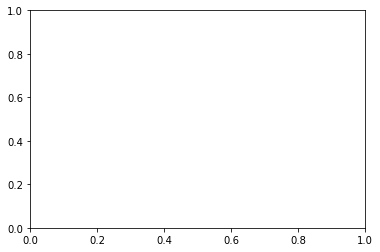

In [311]:
for i in range(10):
    hypo = np.dot(x,theta)
    print("hypothesis is ",hypo,"hypooooooo")
    z = hypo - y
    z
    cost_func = (1/2)* np.mean(np.square(z))
    print("fuuuuuuunc",cost_func,"end func")
    diff_theta = np.dot(x.T , z)
    print(diff_theta)
    gradient = np.linalg.norm(diff_theta,2)
    print(gradient)
    v = v + (diff_theta**2)
    print(v)
    theta = theta - (alfa*diff_theta)/(e + np.sqrt(v))
    print("theta = " , theta)
    cost_lst.append(cost_func)
    print("co000000000000st",cost_lst)
    plt.plot(cost_lst)

In [ ]:
n = 1000
alfa = 2
e = 1 * (10**-8)
v = np.zeros(2)
theta = np.zeros(2)

def adagard_multi(x , y , n , theta , alfa , v , e ):
    m = len(y)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    for i in range (n):
        hypo = np.dot(x,theta)
        z = hypo - y
        cost_func = (1/2)* np.mean(np.square(z))
        diff_theta = np.dot(x.T , z)
        gradient = np.linalg.norm(diff_theta,2)
        v = v + (diff_theta**2)
        theta = theta - (alfa*diff_theta)/(e + np.sqrt(v))
        cost_lst.append(cost_func)
        theta0_lst.append(theta[0])
        theta1_lst.append(theta[1])
        hypo_lst.append(hypo)
        if gradient < .001 :
            break
        
    return cost_lst , theta0_lst , theta1_lst , hypo_lst , theta 
        
        
    

In [312]:

cost_lst , theta0_lst , theta1_lst , hypo_lst , theta = adagard_multi(x,y,n,theta,alfa,v,e)

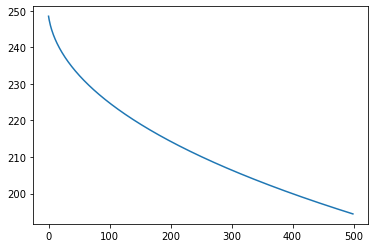

In [313]:
plt.plot(cost_lst)

In [314]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [315]:
y_predicted = theta[0] + theta[1] * x[:,1]

In [316]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

-1.801742360766907

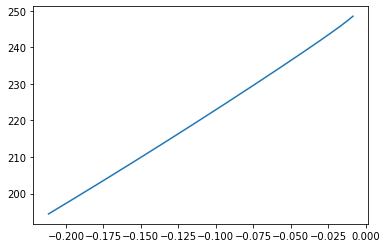

In [317]:
plt.plot(theta0_lst,cost_lst)

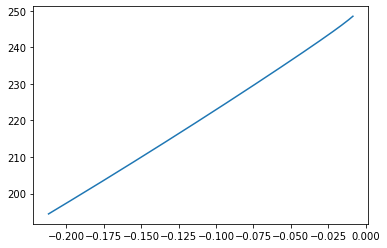

In [318]:
plt.plot(theta1_lst,cost_lst)

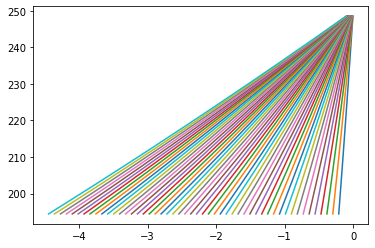

In [319]:
plt.plot(hypo_lst,cost_lst)

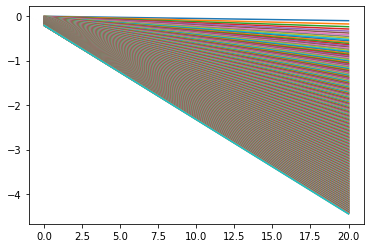

In [320]:
for i in range(len(hypo_lst)):
    plt.plot(x[:,1],hypo_lst[i])

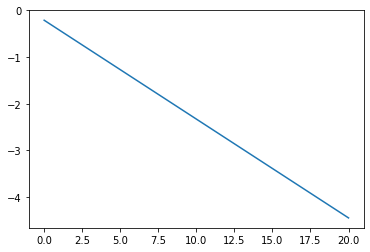

In [321]:
plt.plot(x[:,1],y_predicted)

In [322]:
x = np.linspace(0,20)

e = 1 * (10**-8)
alfa = 2
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 1000

def adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        v0 = v0 + diff_theta0**2
        v1 = v1 + diff_theta1**2
        
        theta0 = theta0 - (alfa*diff_theta0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa*diff_theta1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 
        
    

In [323]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 = adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e )   

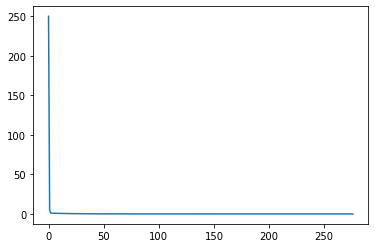

In [324]:
plt.plot(cost_lst)

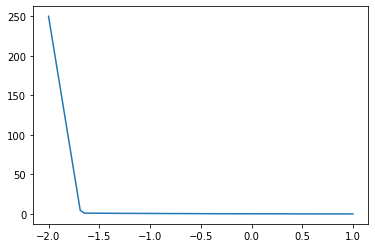

In [325]:
plt.plot(theta0_lst,cost_lst)

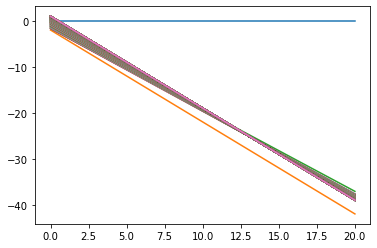

In [326]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

In [327]:
theta =np.zeros(2)
v = np.zeros(2)
x = np.linspace(0,20)
y = -2 * x + 1
m = len(x)
x = x.reshape(m,1)
x0 = np.ones(m)
beta = 0.98
alfa = .005
n = 1000
x = np.insert( x , 0 , x0 , axis = 1)

def rms_prop(x , y , n , theta, v ,alfa , e , beta):
    m = len(y)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    for i in range(n):
        hypo = np.dot(x,theta)
        z = hypo - y
        cost_func = (1/2*m)*np.sum(np.square(z))
        diff_theta = (1/m) * np.dot(x.T,z)
        
        gradient = np.linalg.norm(diff_theta,2)
        
        v = beta * v + (1-beta) * diff_theta**2
        theta = theta - (alfa * diff_theta )/( e + np.sqrt(v))
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta[0])
        theta1_lst.append(theta[1])
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
    return theta , cost_lst , theta0_lst , theta1_lst ,hypo_lst
        
    


In [328]:
theta , cost_lst , theta0_lst , theta1_lst , hypo_lst= rms_prop(x , y , n , theta, v ,alfa , e , beta)

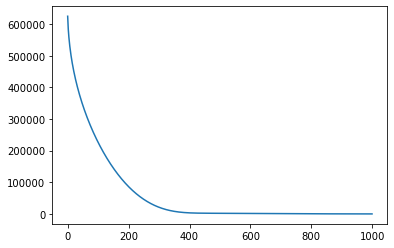

In [329]:
plt.plot(cost_lst)

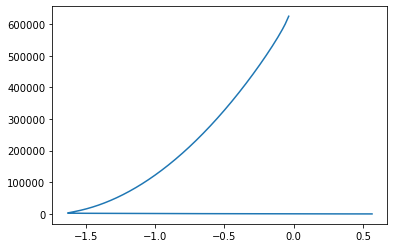

In [330]:
plt.plot(theta0_lst,cost_lst)

In [331]:
y_predicted = theta0 + theta1 * x[:,1]

In [332]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.999999984938514

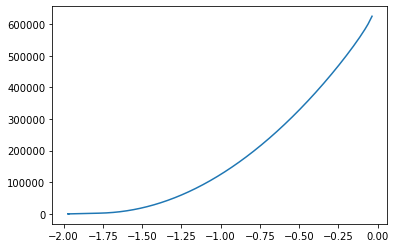

In [333]:
plt.plot(theta1_lst,cost_lst)

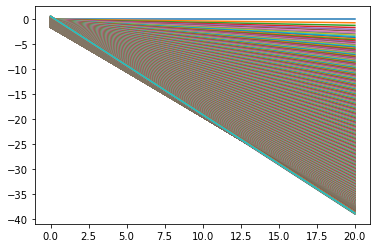

In [334]:
for i in range(len(hypo_lst)):
    plt.plot(x[:,1],hypo_lst[i])

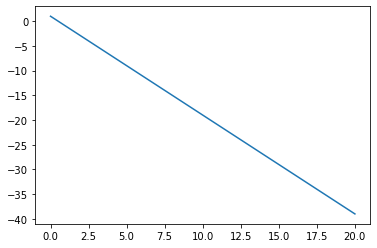

In [335]:
plt.plot(x[:,1],y_predicted)


In [339]:
theta =np.zeros(2)
v = np.zeros(2)
mt = np.zeros(2)
x = np.linspace(0,20)
y = -2 * x + 1
m = len(x)
x = x.reshape(m,1)
x0 = np.ones(m)
beta = 0.98
alfa = .005
n = 1000
beta1 = .98
beta2 = .9
x = np.insert( x , 0 , x0 , axis = 1)

def adam(x , y , n , theta, v , mt , alfa , e , beta1 , beta2 ):
    m = len(y)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    for i in range(n):
        hypo = np.dot(x,theta)
        z = hypo - y
        cost_func = (1/2*m)*np.sum(np.square(z))
        diff_theta = (1/m) * np.dot(x.T,z)
        
        gradient = np.linalg.norm(diff_theta,2)
        
        v = beta2 * v + (1-beta2) * diff_theta**2
        
        mt = beta1 * mt + (1-beta1) * diff_theta 
        theta = theta - (alfa * mt )/( e + np.sqrt(v))
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta[0])
        theta1_lst.append(theta[1])
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
    return theta , cost_lst , theta0_lst , theta1_lst ,hypo_lst
        
    




In [340]:
theta , cost_lst , theta0_lst , theta1_lst ,hypo_lst = adam(x , y , n , theta, v , mt , alfa , e , beta1 , beta2 )

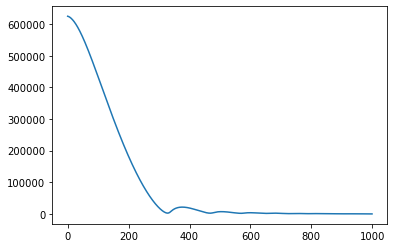

In [341]:
plt.plot(cost_lst)

In [342]:
y_predicted = theta0 + theta1 * x[:,1]

In [343]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.999999984938514

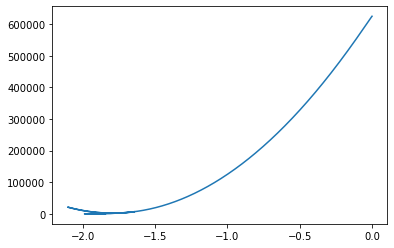

In [344]:
plt.plot(theta1_lst,cost_lst)

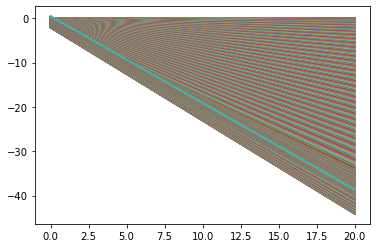

In [345]:
for i in range(len(hypo_lst)):
    plt.plot(x[:,1],hypo_lst[i])